<a href="https://colab.research.google.com/github/pabloguineab/ml2/blob/main/TermProjectG7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Term Project: Body signal of smoking

This dataset is a collection of basic health biological signal data.

The goal is to classify population into smokers and non-smokers through bio-signals.



## 1.	Logistic Regression
## 2.	Decision Tree
## 3.	Random Forest
## 4.	SGD
## 5.	SVM


# INTRODUCTION

# Step 1. Import the necessary libraries

In [ ]:
import numpy as np 
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder #  encoding
import warnings
from sklearn.metrics import  auc,roc_curve, ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report 
from sklearn.preprocessing import MinMaxScaler, StandardScaler # standardization
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import dalex as dx
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')
%matplotlib inline

# Step 2. Import dataset

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['smoking.csv']))
# Dataset is now stored in a Pandas Dataframe

Saving smoking.csv to smoking.csv


# Step 3: Exploratory analysis, Preprocessing Data and Data visualization

In [ ]:
# Dimensions dataset
df.shape

(55692, 27)

In [ ]:
# Show the first 5 samples of the dataset
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


## Create new features from the initial columns

In [ ]:
df['BMI'] = (df['weight(kg)']) / ((df['height(cm)'])**2)

In [ ]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

## Frequency counts of variables

In [ ]:
lbe = LabelEncoder()
lbe.fit_transform(df["gender"])
df["gender"] = lbe.fit_transform(df["gender"])
lbe = LabelEncoder()
lbe.fit_transform(df["tartar"])
df["tartar"] = lbe.fit_transform(df["tartar"])
lbe = LabelEncoder()
lbe.fit_transform(df["oral"])
df["oral"] = lbe.fit_transform(df["oral"])
lbe = LabelEncoder()

## Select dependent and independent variables

In [ ]:
df_ohe = pd.get_dummies(df, drop_first=True)
X = df_ohe.copy()
y = X.pop('smoking')

In [ ]:
col_names = ['smoking', 'gender', 'oral', 'tartar']

for col in col_names:
    
    print(df[col].value_counts())   

0    35237
1    20455
Name: smoking, dtype: int64
1    35401
0    20291
Name: gender, dtype: int64
0    43811
1    11881
Name: dental caries, dtype: int64
Y    55692
Name: oral, dtype: int64
1    30940
0    24752
Name: tartar, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  int64  
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [ ]:
col_names = df.columns
print(col_names)

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking', 'BMI'],
      dtype='object')


In [ ]:
df['smoking'].value_counts()

0    35237
1    20455
Name: smoking, dtype: int64

The dataset is more or less well balanced.

In [ ]:
# Percentage distribution of smoking column
df['smoking'].value_counts()/np.float(len(df))

0    0.632712
1    0.367288
Name: smoking, dtype: float64

In [ ]:
print("There are total {} null values in the dataset".format(df.isnull().sum().sum()))
df.isnull().sum()

There are total 0 null values in the dataset


ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
BMI                    0
dtype: int64

It can be observed that there are no missing values in the dataset.

## Outliers detection

In [ ]:
def outlier_detection(df, n, columns):
    rows = []
    will_drop_train = []
    for col in columns:
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_point = 1.5 * IQR
        rows.extend(df[(df[col] < Q1 - outlier_point)|(df[col] > Q3 + outlier_point)].index)
    for r, c in Counter(rows).items():
        if c >= n: will_drop_train.append(r)
    return will_drop_train

will_drop_train = outlier_detection(df, 5, df.select_dtypes(["float", "int"]).columns)
df.drop(will_drop_train, inplace = True, axis = 0)

## Data visualization

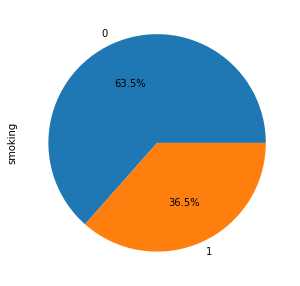

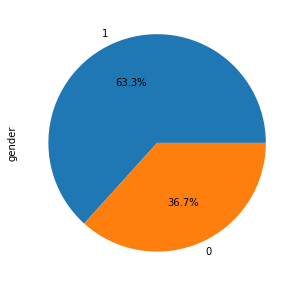

In [ ]:
plt.figure(figsize = [5, 5], clear = True)
df["smoking"].value_counts().plot.pie(autopct = '%1.1f%%');

plt.figure(figsize = [5, 5], clear = True)
df["gender"].value_counts().plot.pie(autopct = '%1.1f%%');

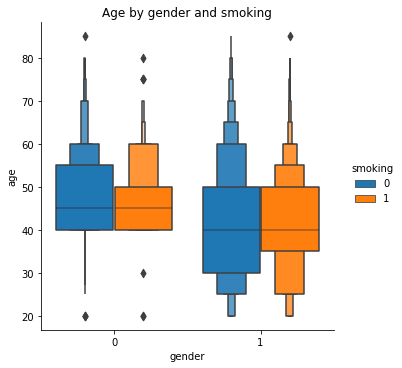

In [ ]:
sns.catplot(x = "gender",
            y = "age",
            hue = "smoking",
            kind = "boxen",
            data = df, saturation = 1, height = 5, aspect = 1,
            margin_titles = True).set(title = "Age by gender and smoking");

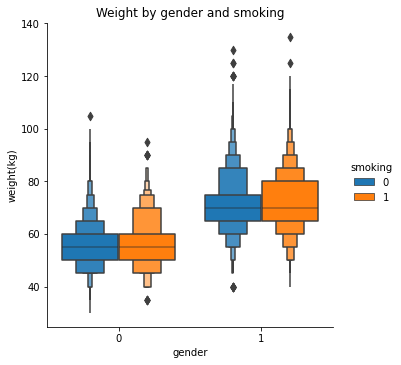

In [ ]:
sns.catplot(x = "gender",
            y = "weight(kg)",
            hue = "smoking",
            kind = "boxen",
            data = df, saturation = 1, height = 5, aspect = 1,
            margin_titles = True).set(title = "Weight by gender and smoking");

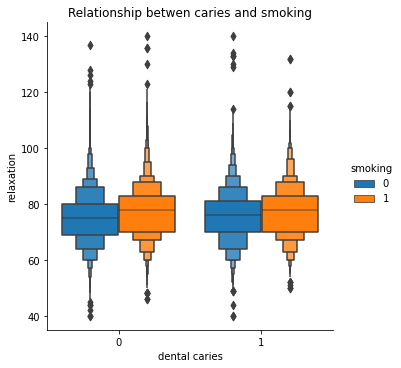

In [ ]:
sns.catplot(x = "dental caries",
            y = "relaxation",
            hue = "smoking",
            kind = "boxen",
            data = df, saturation = 1, height = 5, aspect = 1,
            margin_titles = True).set(title = "Relationship betwen caries and smoking");

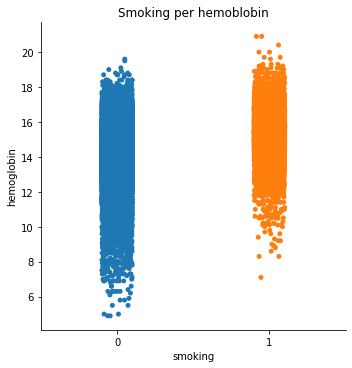

<Figure size 432x288 with 0 Axes>

In [ ]:
#By eye, we can see that hemoglobin, the numerical feature that shows some relation with the smoking or not.
sns.catplot(x='smoking', y='hemoglobin',hue = "smoking", data=df, kind='strip')
plt.title(f'Smoking per hemoblobin')
plt.show()
plt.clf()

## Select numerical variables

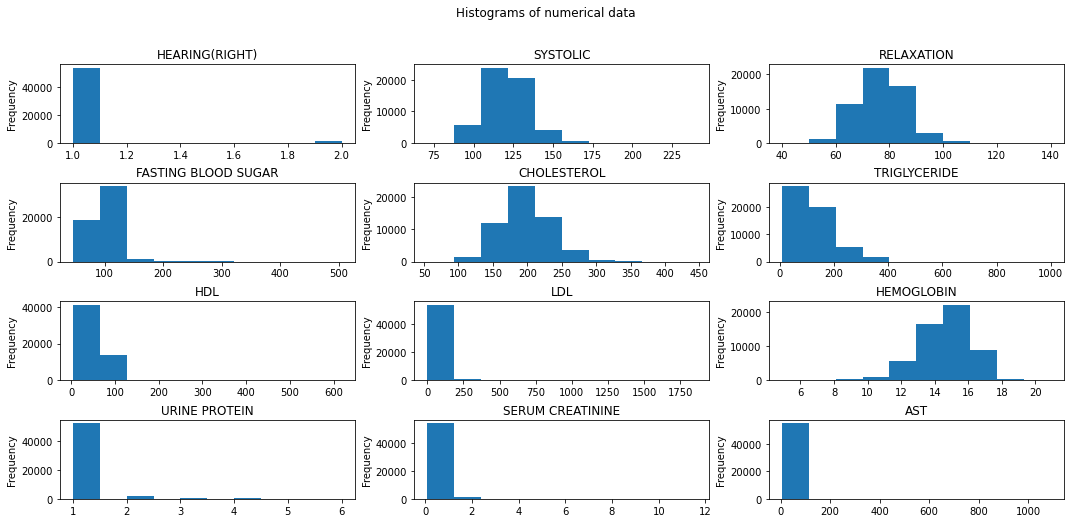

In [ ]:
num_feat = df.select_dtypes([float, int]).columns

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(18, 8))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Histograms of numerical data")


for col, ax in zip(num_feat[9:], axs.ravel()):
    df[[col]].plot(ax=ax, kind= 'hist' )

    
    ax.set_title(col.upper())
    ax.get_legend().remove()
    ax.set_xlabel("")

plt.show()

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Scaling data

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

# Step 5: Initializing the classifiers

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Initializing Logistic Regression classifier
log_reg = LogisticRegression()

# Initializing Random Forest classifier
rnd_frst = RandomForestClassifier()

# Initializing XGBoost
xgb_model = XGBClassifier()

# Initializing Decision Tree classifier
dsc_tree = DecisionTreeClassifier()

# Initializing Support Vector Machine (SVM) classifier
svm = SVC()

# Initializing Stochastic Gradient Descent (SGD) classifier
sgd = SGDClassifier()

# Step 6: Fitting the models

In [ ]:
# Fitting the logistic regression model on the training data
log_reg = log_reg.fit(X_train, y_train)

# Fitting the random forest model on the training data
rnd_frst = rnd_frst.fit(X_train, y_train)

# Fitting XGBoost
xgb_model = xgb_model.fit(X_train, y_train)

# Fitting the decision tree model on the training data
dsc_tree = dsc_tree.fit(X_train, y_train)

# Fitting the SVM model on the training data
svm = svm.fit(X_train, y_train)

# Fitting the SGD model on the training data
sgd = sgd.fit(X_train, y_train)

# Step 7: Coming up with predictions

In [ ]:
# Logistic Regression predictions
log_reg_predictions = log_reg.predict(X_test)

# Random Forest predictions
rnd_frst_predictions = rnd_frst.predict(X_test)

# Random XGBoost predictions
xgb_model_predictions = xgb_model.predict(X_test)

# Decision Tree predictions
dsc_tree_predictions = dsc_tree.predict(X_test)

# SVM predictions
svm_predictions = svm.predict(X_test)

# SGD predictions
sgd_predictions = sgd.predict(X_test)

# Step 8: Evaluating models performances

In [ ]:
# Logistic Regression accuracy
log_reg_acc = accuracy_score(y_test, log_reg_predictions)
print("Logistic Regression Accuracy: ", log_reg_acc)

# Random Forest accuracy
rnd_frst_acc = accuracy_score(y_test, rnd_frst_predictions)
print("Random Forest Accuracy: ", rnd_frst_acc)

# Random Forest XGBoost accuracy
xgb_model_acc = accuracy_score(y_test, xgb_model_predictions)
print("XGBoost Forest Accuracy: ", xgb_model_acc)

# Decision Tree accuracy
dsc_tree_acc = accuracy_score(y_test, dsc_tree_predictions)
print("Decision Tree Accuracy: ", dsc_tree_acc)

# SVM accuracy
svm_acc = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy: ", svm_acc)

# SGD accuracy
sgd_acc = accuracy_score(y_test, sgd_predictions)
print("SGD Accuracy: ", sgd_acc)

Logistic Regression Accuracy:  0.692162671694048
Random Forest Accuracy:  0.8301463327049107
XGBoost Forest Accuracy:  0.7574288535775204
Decision Tree Accuracy:  0.7689200107729599
SVM Accuracy:  0.6308465750965078
SGD Accuracy:  0.6505970015261693


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression evaluation metrics
log_reg_acc = accuracy_score(y_test, log_reg_predictions)
log_reg_prec = precision_score(y_test, log_reg_predictions)
log_reg_rec = recall_score(y_test, log_reg_predictions)
log_reg_f1 = f1_score(y_test, log_reg_predictions)

# Random Forest evaluation metrics
rnd_frst_acc = accuracy_score(y_test, rnd_frst_predictions)
rnd_frst_prec = precision_score(y_test, rnd_frst_predictions)
rnd_frst_rec = recall_score(y_test, rnd_frst_predictions)
rnd_frst_f1 = f1_score(y_test, rnd_frst_predictions)

# Random Forest XGBoost evaluation metrics
xgb_model_acc = accuracy_score(y_test, xgb_model_predictions)
xgb_model_prec = precision_score(y_test, xgb_model_predictions)
xgb_model_rec = recall_score(y_test, xgb_model_predictions)
xgb_model_f1 = f1_score(y_test, xgb_model_predictions)

# Decision Tree evaluation metrics
dsc_tree_acc = accuracy_score(y_test, dsc_tree_predictions)
dsc_tree_prec = precision_score(y_test, dsc_tree_predictions)
dsc_tree_rec = recall_score(y_test, dsc_tree_predictions)
dsc_tree_f1 = f1_score(y_test, dsc_tree_predictions)

# SVM evaluation metrics
svm_acc = accuracy_score(y_test, svm_predictions)
svm_prec = precision_score(y_test, svm_predictions)
svm_rec = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)

# SGD evaluation metrics
sgd_acc = accuracy_score(y_test, sgd_predictions)
sgd_prec = precision_score(y_test, sgd_predictions)
sgd_rec = recall_score(y_test, sgd_predictions)
sgd_f1 = f1_score(y_test, sgd_predictions)

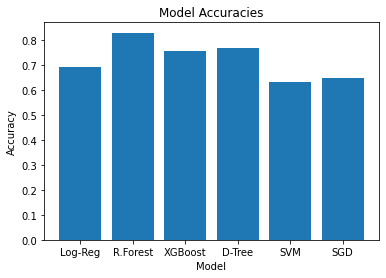

In [ ]:
import matplotlib.pyplot as plt

# Create a list of accuracy values for each model
accuracies = [log_reg_acc, rnd_frst_acc,xgb_model_acc, dsc_tree_acc, svm_acc, sgd_acc]

# Create a list of the model names
model_names = ['Log-Reg', 'R.Forest', 'XGBoost' , 'D-Tree', 'SVM', 'SGD']

# Plot the bar chart
plt.bar(model_names, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()

# Testing different types of hyperparameter's model configuration

### Logistic Regression


### Using GridSearchCV to find the best parameters for Logistic Regression

In [ ]:
#First, importing GridSearchCV
from sklearn.model_selection import GridSearchCV

#Defining different parameters to be investigated and choosing the best ones
param_grid = {'penalty': ['none','l1', 'l2'], 'C': [0.01, 0.1, 1],
              'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
grid = GridSearchCV(log_reg,param_grid,refit=True,verbose=3)

### Coming up with GridSearchCV fitting and predictions

In [ ]:
#Fitting GridSearchCV
grid.fit(x_train,y_train)

#Finding best parameters and estimator using GridSearchCV attributes
grid.best_params_
grid.best_estimator_

#Coming up with predictions
grid_predictions = grid.predict(x_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END C=0.01, penalty=none, solver=lbfgs;, score=0.755 total time=   0.5s
[CV 2/5] END C=0.01, penalty=none, solver=lbfgs;, score=0.748 total time=   0.5s
[CV 3/5] END C=0.01, penalty=none, solver=lbfgs;, score=0.748 total time=   0.5s
[CV 4/5] END C=0.01, penalty=none, solver=lbfgs;, score=0.740 total time=   0.5s
[CV 5/5] END C=0.01, penalty=none, solver=lbfgs;, score=0.743 total time=   0.5s
[CV 1/5] END C=0.01, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, penalty=none, solver=newton-cg;, score=0.755 total time=   0.5s
[CV 2/5] END C=0.01, penalty=none

[CV 4/5] END C=0.01, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 1/5] END .C=0.1, penalty=none, solver=lbfgs;, score=0.755 total time=   0.4s
[CV 2/5] END .C=0.1, penalty=none, solver=lbfgs;, score=0.748 total time=   0.4s
[CV 3/5] END .C=0.1, penalty=none, solver=lbfgs;, score=0.748 total time=   0.4s
[CV 4/5] END .C=0.1, penalty=none, solver=lbfgs;, score=0.740 total time=   0.4s
[CV 5/5] END .C=0.1, penalty=none, solver=lbfgs;, score=0.743 total time=   0.4s
[CV 1/5] END C=0.1, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.

[CV 1/5] END C=0.1, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 1/5] END ...C=1, penalty=none, solver=lbfgs;, score=0.755 total time=   0.4s
[CV 2/5] END ...C=1, penalty=none, solver=lbfgs;, score=0.748 total time=   0.4s
[CV 3/5] END ...C=1, penalty=none, solver=lbfgs;, score=0.748 total time=   0.4s
[CV 4/5] END ...C=1, penalty=none, solver=lbfgs;, score=0.740 total time=   0.4s
[CV 5/5] END ...C=1, penalty=none, solver=lbfgs;, score=0.743 total time=   0.6s
[CV 1/5] END .C=1, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END .C=1, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END .C=1,

[CV 3/5] END C=1, penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=1, penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=1, penalty=elasticnet, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END .C=1, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .C=1, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END .C=1, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END .C=1, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END .C=1, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=1, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=1, penalty=elasticnet, solver=saga;, score=nan total time=   0.0s
[CV 4/5] END C=1, penalty=elasticnet, solver=saga;, score=nan total time=   

### Evaluating GridSearchCV performance

In [ ]:
#Evaluating Performance
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[5428 1599]
 [1282 2830]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      7027
           1       0.64      0.69      0.66      4112

    accuracy                           0.74     11139
   macro avg       0.72      0.73      0.73     11139
weighted avg       0.75      0.74      0.74     11139



### Decision Tree


In [ ]:
#Insert code here
#Defining different parameters to be investigated and choosing the best ones
param_grid ={'max_depth': range(1,20,2),'min_samples_leaf': range(1,100,5),'min_samples_split': range(2,10),'criterion': ["gini", "entropy"],'splitter':['best', 'random'],'max_features': ['auto']}
grid = GridSearchCV(dsc_tree,param_grid,refit=True,verbose=3)

In [ ]:
#Fitting GridSearchCV
grid.fit(x_train,y_train)

#Finding best parameters and estimator using GridSearchCV attributes
grid.best_params_
grid.best_estimator_

#Coming up with predictions
grid_predictions = grid.predict(x_test)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
[CV 1/5] END max_leaf_nodes=2, min_samples_split=2;, score=0.704 total time=   0.1s
[CV 2/5] END max_leaf_nodes=2, min_samples_split=2;, score=0.709 total time=   0.1s
[CV 3/5] END max_leaf_nodes=2, min_samples_split=2;, score=0.698 total time=   0.1s
[CV 4/5] END max_leaf_nodes=2, min_samples_split=2;, score=0.695 total time=   0.1s
[CV 5/5] END max_leaf_nodes=2, min_samples_split=2;, score=0.698 total time=   0.1s
[CV 1/5] END max_leaf_nodes=2, min_samples_split=3;, score=0.704 total time=   0.1s
[CV 2/5] END max_leaf_nodes=2, min_samples_split=3;, score=0.709 total time=   0.1s
[CV 3/5] END max_leaf_nodes=2, min_samples_split=3;, score=0.698 total time=   0.1s
[CV 4/5] END max_leaf_nodes=2, min_samples_split=3;, score=0.695 total time=   0.1s
[CV 5/5] END max_leaf_nodes=2, min_samples_split=3;, score=0.698 total time=   0.1s
[CV 1/5] END max_leaf_nodes=2, min_samples_split=4;, score=0.704 total time=   0.1s
[CV 2/5] END

In [ ]:
#Evaluating Performance
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[5444 1583]
 [1360 2752]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      7027
           1       0.63      0.67      0.65      4112

    accuracy                           0.74     11139
   macro avg       0.72      0.72      0.72     11139
weighted avg       0.74      0.74      0.74     11139



### Random Forest


In [ ]:
#Insert code here
#Defining different parameters to be investigated and choosing the best ones
param_grid = {'n_estimators': [10, 50, 100, 600], 'max_depth': [2, 4, 8, 16, None],'criterion': ['gini', 'entropy']}
grid = GridSearchCV(rnd_frst,param_grid,refit=True,verbose=3)

In [ ]:
#Fitting GridSearchCV
grid.fit(x_train,y_train)

#Finding best parameters and estimator using GridSearchCV attributes
grid.best_params_
grid.best_estimator_

#Coming up with predictions
grid_predictions = grid.predict(x_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END criterion=gini, max_depth=2, n_estimators=10;, score=0.714 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, n_estimators=10;, score=0.724 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, n_estimators=10;, score=0.714 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, n_estimators=10;, score=0.721 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, n_estimators=10;, score=0.716 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, n_estimators=50;, score=0.713 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=2, n_estimators=50;, score=0.725 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=2, n_estimators=50;, score=0.722 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=2, n_estimators=50;, score=0.705 total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=2, n_estimators=50;, score=0.719 total time=   0.7s
[CV 1/5] END criterion=gini,

In [ ]:
#Evaluating Performance
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[5978 1049]
 [ 819 3293]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7027
           1       0.76      0.80      0.78      4112

    accuracy                           0.83     11139
   macro avg       0.82      0.83      0.82     11139
weighted avg       0.83      0.83      0.83     11139



### XGBoost

In [ ]:
#Insert code here
#Defining different parameters to be investigated and choosing the best ones
param_grid = {'max_depth': range (2, 10, 1),'n_estimators': range(60, 220, 40),'learning_rate': [0.1, 0.01, 0.05]}
grid = GridSearchCV(xgb_model,param_grid,refit=True,verbose=3)

In [ ]:
#Fitting GridSearchCV
grid.fit(x_train,y_train)

#Finding best parameters and estimator using GridSearchCV attributes
grid.best_params_
grid.best_estimator_

#Coming up with predictions
grid_predictions = grid.predict(x_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=0.753 total time=   1.0s
[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=0.761 total time=   1.0s
[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=0.756 total time=   1.0s
[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=0.751 total time=   1.0s
[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=0.756 total time=   1.1s
[CV 1/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.760 total time=   1.7s
[CV 2/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.766 total time=   1.6s
[CV 3/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.763 total time=   1.6s
[CV 4/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.759 total time=   1.6s
[CV 5/5] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.762 total time= 

In [ ]:
#Evaluating Performance
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[5826 1201]
 [1041 3071]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      7027
           1       0.72      0.75      0.73      4112

    accuracy                           0.80     11139
   macro avg       0.78      0.79      0.79     11139
weighted avg       0.80      0.80      0.80     11139



### SGD

In [ ]:
#Insert code here

param_grid = {'loss':['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],
              'alpha': [1,0.1,0.01,0.001,0.0001],
              'penalty':['l1']}
grid = GridSearchCV(sgd,param_grid,refit=True,verbose=3)


In [ ]:
#Fitting GridSearchCV
grid.fit(x_train,y_train)

#Finding best parameters and estimator using GridSearchCV attributes
grid.best_params_
grid.best_estimator_

#Coming up with predictions
grid_predictions = grid.predict(x_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ...alpha=1, loss=hinge, penalty=l1;, score=0.633 total time=   0.1s
[CV 2/5] END ...alpha=1, loss=hinge, penalty=l1;, score=0.633 total time=   0.1s
[CV 3/5] END ...alpha=1, loss=hinge, penalty=l1;, score=0.633 total time=   0.1s
[CV 4/5] END ...alpha=1, loss=hinge, penalty=l1;, score=0.633 total time=   0.1s
[CV 5/5] END ...alpha=1, loss=hinge, penalty=l1;, score=0.633 total time=   0.1s
[CV 1/5] END ..alpha=1, loss=log_loss, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ..alpha=1, loss=log_loss, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ..alpha=1, loss=log_loss, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ..alpha=1, loss=log_loss, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ..alpha=1, loss=log_loss, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END alpha=1, loss=modified_huber, penalty=l1;, score=0.633 total time=   0.1s
[CV 2/5] END alpha=1, loss=modified_huber

In [ ]:
#Evaluating Performance
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[5586 1441]
 [1516 2596]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      7027
           1       0.64      0.63      0.64      4112

    accuracy                           0.73     11139
   macro avg       0.71      0.71      0.71     11139
weighted avg       0.73      0.73      0.73     11139



### SVM

In [ ]:
#Defining different parameters to be investigated and choosing the best ones
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01], 'kernel': ['linear', "poly",'rbf']}
grid = GridSearchCV(svm,param_grid,refit=True,verbose=3)

In [ ]:
#Fitting GridSearchCV
grid.fit(x_train,y_train)

#Finding best parameters and estimator using GridSearchCV attributes
grid.best_params_
grid.best_estimator_

#Coming up with predictions
grid_predictions = grid.predict(x_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.741 total time=  34.7s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.739 total time=  36.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.729 total time=  34.6s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.727 total time=  34.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.733 total time=  34.6s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.755 total time=  39.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.751 total time=  39.4s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.752 total time=  39.7s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.743 total time=  39.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.744 total time=  39.4s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.735 total time=  54.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

In [ ]:
#Evaluating Performance
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[5475 1552]
 [1144 2968]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      7027
           1       0.66      0.72      0.69      4112

    accuracy                           0.76     11139
   macro avg       0.74      0.75      0.75     11139
weighted avg       0.76      0.76      0.76     11139



#### Testing diferent kids of kernels

## 1. Polynomial Kernel

In [ ]:
svm_poly = SVC(kernel='poly')
svm_poly.fit(x_train, y_train)

SVC(kernel='poly')

In [ ]:
y_pred = svm_poly.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5321 1706]
 [1134 2978]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      7027
           1       0.64      0.72      0.68      4112

    accuracy                           0.75     11139
   macro avg       0.73      0.74      0.73     11139
weighted avg       0.75      0.75      0.75     11139



## 2. Gaussian Kernel

In [ ]:
svm_gaussian = SVC(kernel='rbf')
svm_gaussian.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = svm_gaussian.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5205 1822]
 [1072 3040]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      7027
           1       0.63      0.74      0.68      4112

    accuracy                           0.74     11139
   macro avg       0.73      0.74      0.73     11139
weighted avg       0.75      0.74      0.74     11139



## 3. Sigmoid Kernel

In [ ]:
svc_sig = SVC(kernel='sigmoid')
svc_sig.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [ ]:
y_pred = svc_sig.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4431 2596]
 [2741 1371]]
              precision    recall  f1-score   support

           0       0.62      0.63      0.62      7027
           1       0.35      0.33      0.34      4112

    accuracy                           0.52     11139
   macro avg       0.48      0.48      0.48     11139
weighted avg       0.52      0.52      0.52     11139



## Grid Search - Tuning Hyperparameters / Evaluating models performance   

In [ ]:
# Define the parameter grids for each model
log_reg_param_grid = {'C': [0.1, 1, 10]}
rnd_frst_param_grid = {'n_estimators': [10, 50, 100, 600], 'max_depth': [2, 4, 8, 16, 32, None],'criterion': ['gini', 'entropy']}
xgb_model_param_grid = {'max_depth': range (2, 10, 1),'n_estimators': range(60, 220, 40),'learning_rate': [0.1, 0.01, 0.05]}
dsc_tree_param_grid = {'max_depth': range(1,20,2),'min_samples_leaf': range(1,100,5),'min_samples_split': range(2,10),'criterion': ["gini", "entropy"],'splitter':['best', 'random'],'max_features': ['auto']}
svm_param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01], 'kernel': ['linear', "poly", "sigmoid",'rbf']}
sgd_param_grid =  {'loss':['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],
              'alpha': [1,0.1,0.01,0.001,0.0001],
              'penalty':['l1']}

# Initialize the models
log_reg = LogisticRegression()
rnd_frst = RandomForestClassifier()
xgb_model = XGBClassifier()
dsc_tree = DecisionTreeClassifier()
svm = SVC()
sgd = SGDClassifier()

# Create a list of models and parameter grids
models = [log_reg, rnd_frst,xgb_model, dsc_tree, svm, sgd]
param_grids = [log_reg_param_grid, rnd_frst_param_grid, dsc_tree_param_grid, svm_param_grid, sgd_param_grid]

# Loop through the models and perform grid search for each
for model, param_grid in zip(models, param_grids):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print("Model:", grid_search, "Best params:", best_params, "Best score:", best_score)

Model: GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10]}, scoring='accuracy') Best params: {'C': 1} Best score: 0.6988530500078025
Model: GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [10, 50, 100, 600]},
             scoring='accuracy') Best params: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 600} Best score: 0.8207976295329006


#Feature Selection

## Pearson Correlation 

In [ ]:
def cor_selector(X, y,num_feats):
    # Your code goes here (Multiple lines)
    cor_list = []
    for i in X.columns.tolist():
            cor = np.corrcoef(X[i], y)[0, 1]
            cor_list.append(cor)
    cor_list = [0 if np.isnan(i) else i for i in cor_list]    
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    cor_support = [True if i in cor_feature else False for i in feature_name]
    print(cor_support)
    print(cor_feature)   
    # Your code ends here
    return cor_support, cor_feature

cor_selector(X_train, y_train, 15)


## Chi-Sqaure

In [ ]:
def chi_squared_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    X_norm = MinMaxScaler().fit_transform(X)
    chi_selector = SelectKBest(chi2, k=num_feats)
    chi_selector.fit(X_norm, y)
    chi_support = chi_selector.get_support()
    chi_feature = X.loc[:,chi_support].columns.tolist()
    print(chi_support)
    print(chi_feature)
    # Your code ends here
    return chi_support, chi_feature

cor_selector(X_train, y_train, 15)

## RFE Selector function

In [ ]:
def rfe_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    X_norm = MinMaxScaler().fit_transform(X)
    rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
    rfe_selector.fit(X_norm, y)
    rfe_support = rfe_selector.get_support()
    rfe_feature = X.loc[:,rfe_support].columns.tolist()
    print(rfe_support)
    print(rfe_feature)  
    # Your code ends here
    return rfe_support, rfe_feature

rfe_selector(X_train, y_train, 15)

#GridSearchCV with Feature Selection (Chi Square) / 15 Features

In [ ]:

X_train = X_train["" , "", "", "", "", "", "", "", "", "", "", "", "", "", ""]


# Define the parameter grids for each model
log_reg_param_grid = {'C': [0.1, 1, 10]}
rnd_frst_param_grid = {'n_estimators': [10, 50, 100, 600], 'max_depth': [2, 4, 8, 16, 32, None],'criterion': ['gini', 'entropy']}
xgb_model_param_grid = {'max_depth': range (2, 10, 1),'n_estimators': range(60, 220, 40),'learning_rate': [0.1, 0.01, 0.05]}
dsc_tree_param_grid = {'max_depth': range(1,20,2),'min_samples_leaf': range(1,100,5),'min_samples_split': range(2,10),'criterion': ["gini", "entropy"],'splitter':['best', 'random'],'max_features': ['auto']}
svm_param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01], 'kernel': ['linear', "poly", "sigmoid",'rbf']}
sgd_param_grid =  {'loss':['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],
              'alpha': [1,0.1,0.01,0.001,0.0001],
              'penalty':['l1']}

# Initialize the models
log_reg = LogisticRegression()
rnd_frst = RandomForestClassifier()
xgb_model = XGBClassifier()
dsc_tree = DecisionTreeClassifier()
svm = SVC()
sgd = SGDClassifier()

# Create a list of models and parameter grids
models = [log_reg, rnd_frst,xgb_model, dsc_tree, svm, sgd]
param_grids = [log_reg_param_grid, rnd_frst_param_grid, dsc_tree_param_grid, svm_param_grid, sgd_param_grid]

# Loop through the models and perform grid search for each
for model, param_grid in zip(models, param_grids):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print("Model:", grid_search, "Best params:", best_params, "Best score:", best_score)


## Creating an Explainer object

In [ ]:
!pip install dalex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.5.0-py3-none-any.whl size=1043321 sha256=e778a0693dcfe4e2f2a2b10342e796fdb929c728dc636da8324ecb8119aaed3d
  Stored in directory: /root/.cache/pip/wheels/b1/02/58/77ac4cb307fec9f3324c6aa4f9f23a7b0e886e313ebc280257
Successfully built dalex


In [ ]:
exp = dx.Explainer(models,X_test, y_test)

In [ ]:
exp.model_performance()

In [ ]:
exp.model_parts().plot()